In [1]:
import scipy as scipy
from scipy import stats
from scipy.stats import norm
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize
from scipy.optimize import root
from scipy.integrate import quad
from matplotlib import pyplot as plt

In [ ]:
#set gamma
gamma=2
#Payoffs from assets:
A1=np.array([1,1,1,1])
A2=np.array([1,1,1.5,1.5])
#Endowments:
e0h1=1
e0h2=1
eh1=np.array([1,2,1,2])
eh2=np.array([3,1,3,1])

In [ ]:
def fun(x):
    #Parameters we need to solve for: 
    #x1h1 x1h2 x2h1 x2h2
    #System of Equations: 
    #Household 1
    #FOC wrt x1h
    #x=[x1h1, x2h1,x1h2, x2h2,p1,p2]
    x1h1=x[0]
    x2h1=x[1]
    x1h2=x[2]
    x2h2=x[3]
    p1=x[4]
    p2=x[5]
    return \
     [0.25*(eh1[0]+x1h1*A1[0]+x2h1*A2[0])**(-gamma)*A1[0]+ #s0
     0.25*(eh1[1]+x1h1*A1[1]+x2h1*A2[1])**(-gamma)*A1[1]+ #s1
     0.25*(eh1[2]+x1h1*A1[2]+x2h1*A2[2])**(-gamma)*A1[2]+ #s2
     0.25*(eh1[3]+x1h1*A1[3]+x2h1*A2[3])**(-gamma)*A1[3]-  
     (e0h1-x1h1*p1-x2h1*p2)**(-gamma)*p1,
    #FOC wrt x2h
     0.25*(eh1[0]+x1h1*A1[0]+x2h1*A2[0])**(-gamma)*A2[0]+ #0
     0.25*(eh1[1]+x1h1*A1[1]+x2h1*A2[1])**(-gamma)*A2[1]+ #1
     0.25*(eh1[2]+x1h1*A1[2]+x2h1*A2[2])**(-gamma)*A2[2]+ #2
     0.25*(eh1[3]+x1h1*A1[3]+x2h1*A2[3])**(-gamma)*A2[3]- 
    (e0h1-x1h1*p1-x2h1*p2)**(-gamma)*p2,
    #Household 2
     0.25*(eh2[0]+x1h2*A1[0]+x2h2*A2[0])**(-gamma)*A1[0]+ #0
     0.25*(eh2[1]+x1h2*A1[1]+x2h2*A2[1])**(-gamma)*A1[1]+ #1
     0.25*(eh2[2]+x1h2*A1[2]+x2h2*A2[2])**(-gamma)*A1[2]+ #2
     0.25*(eh2[3]+x1h2*A1[3]+x2h2*A2[3])**(-gamma)*A1[3]-
    (e0h2-x1h2*p1-x2h2*p2)**(-gamma)*p1,
    #FOC wrt x2h
     0.25*(eh2[0]+x1h2*A1[0]+x2h2*A2[0])**(-gamma)*A2[0]+ #0
     0.25*(eh2[1]+x1h2*A1[1]+x2h2*A2[1])**(-gamma)*A2[1]+ #1
     0.25*(eh2[2]+x1h2*A1[2]+x2h2*A2[2])**(-gamma)*A2[2]+ #2
     0.25*(eh2[3]+x1h2*A1[3]+x2h2*A2[3])**(-gamma)*A2[3]- 
    (e0h2-x1h2*p1-x2h2*p2)**(-gamma)*p2,
    #Market clearing: 
    x1h1+x1h2,
    x2h1+x2h2]

In [ ]:
sol=scipy.optimize.root(fun, [0.5,0.5,0.5, 0.5,0.5,0.5])
print(sol.x)

In [ ]:
gamma=4
sol=scipy.optimize.root(fun, [0.5,0.5,0.5, 0.5,0.5,0.5])
print(sol.x)

In [ ]:
gamma=8
sol=scipy.optimize.root(fun, [0.5,0.5,0.5, 0.5,0.5,0.5])
print(sol.x)

In [ ]:
gamma=166
sol=scipy.optimize.root(fun, [0.5,0.5,0.5, 0.5,0.5,0.5])
print(sol.x)

# Ramsey 1

In [11]:
#Initialize the problem:
beta=0.9
pi=0.5
sgrid=[1,2]
tolForFixedPoint=0.001
max_iterations=500

In [12]:
def objectivefun(EV1,K,K1,S):
    if S==1:
        c=0.9*K**0.3+0.3*K-K1
    else:
        c=1.1*K**0.3+0.9*K-K1
    value= np.zeros_like(c)
    value[c<=0]=-1000000
    value[c>0]=np.log(c[c>0])+beta*EV1[c>0] 
    return value

In [1]:
def V(grid_size):    
    kgrid=np.linspace(0.001,10,grid_size)
    EV1  = np.zeros(len(kgrid))   
    diff=1
    ixiter=0
    V=np.empty([len(kgrid),len(kgrid)])
    policy  = np.empty([len(kgrid),2])
    
    K1=np.linspace(0.001,1,len(kgrid))
    
    for ixiter  in range(max_iterations): 
        EV = np.zeros(len(kgrid))
        for ii, K in enumerate(kgrid): 
            #K=kgrid[ki]
            for jj, S in enumerate(sgrid): 
                #S=sgrid[sj]
                
                Vvalue=objectivefun(EV1,K,K1,S)

                optval=np.amax(Vvalue)
                policy[ii,jj]=kgrid[np.argmax(Vvalue)]
                V[ii,jj]=optval
                
            EV[ii]=pi* V[ii,0]+pi* V[ii,1]

        diff=np.amax(abs(EV1 - EV))

        EV1=np.copy(EV)
        if diff < tolForFixedPoint:
            break
    print(ixiter)
    return policy, V


In [59]:
grid_size=500
policy, Val  =V(grid_size)
kgrid=np.linspace(0.001,10,grid_size)

72


Text(0.5, 1.0, 'Policy function')

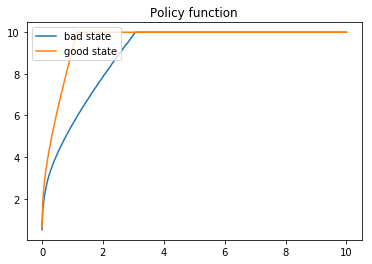

In [58]:
plt.plot(kgrid, policy[:,0], label="bad state")
plt.plot(kgrid, policy[:,1], label="good state")
plt.legend(loc="upper left")
plt.title("Policy function")

Text(0.5, 1.0, 'Value function')

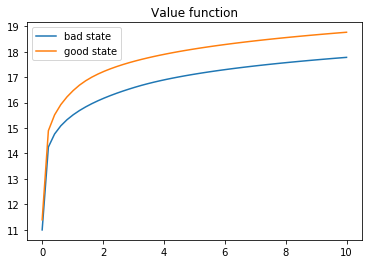

In [47]:
plt.plot(kgrid, Val[:,0], label="bad state")
plt.plot(kgrid, Val[:,1], label="good state")
plt.legend(loc="upper left")
plt.title("Value function")

In [ ]:
c=np.array([-1,-4,50,3,0,-2])
value= np.zeros_like(c)
value[c<0]=-1000000
value[c>0]=np.log(c[c>0])+28  